# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [103]:
# Import packages
### YOUR CODE HERE ### 

# For data manipulation
import numpy as np
import pandas as pd

#For visualization
import matplotlib.pyplot as plt
import seaborn as sns

#for showing all columns
pd.set_option('display.max_columns', None)

#metrics and helpfull libraries
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score,precision_score, recall_score,f1_score, ConfusionMatrixDisplay,classification_report,roc_auc_score

#for model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#for saving model
import pickle

from xgboost import plot_importance
from sklearn.tree import plot_tree

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
### YOUR CODE HERE ###
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
### YOUR CODE HERE ###
df0.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [3]:
# Gather basic information about the data
### YOUR CODE HERE ###
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [4]:
# Gather descriptive statistics about the data
### YOUR CODE HERE ###
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [5]:
# Display all column names
### YOUR CODE HERE ###
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [6]:
# Rename columns as needed
### YOUR CODE HERE ###
df0.rename(columns={'Work_accident':'work_accident',
                   'Department':'department',
                   'average_montly_hours':'average_monthly_hours',
                   'time_spend_company':'tenure'}, inplace=True)

# Display all column names after the update
### YOUR CODE HERE ###
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [7]:
# Check for missing values
### YOUR CODE HERE ###
df0.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [8]:
# Check for duplicates
### YOUR CODE HERE ###
df0.duplicated().sum()

3008

In [9]:
# Inspect some rows containing duplicates as needed
### YOUR CODE HERE ###
df0[df0.duplicated()].head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low


In [10]:
# Drop duplicates and save resulting dataframe in a new variable as needed
### YOUR CODE HERE ###
df1 = df0.drop_duplicates(keep='first')

# Display first few rows of new dataframe as needed
### YOUR CODE HERE ###
df1.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check outliers

Check for outliers in the data.

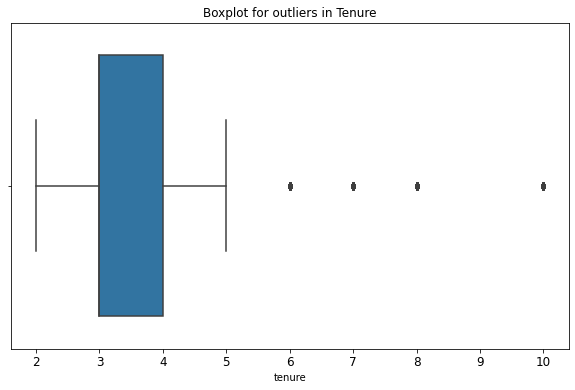

In [11]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
### YOUR CODE HERE ###
plt.figure(figsize=(10,6))
plt.title('Boxplot for outliers in Tenure')
plt.xticks(fontsize=12)

sns.boxplot(x =df1['tenure'])
plt.show()


In [12]:
# Determine the number of rows containing outliers
### YOUR CODE HERE ###
perc_25 = df1['tenure'].quantile(0.25)

perc_75 = df1['tenure'].quantile(0.75)

IQR = perc_75 - perc_25

lower_range = perc_25 - (1.5 * IQR)

upper_range = perc_75 + (1.5 * IQR)

print("Lower limit : ",lower_range,", Upper limit : ",upper_range)

tenure_outliers = df1[(df1['tenure'] < lower_range) | (df1['tenure'] > upper_range)]
len(tenure_outliers)


Lower limit :  1.5 , Upper limit :  5.5


824

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [13]:
# Get numbers of people who left vs. stayed
### YOUR CODE HERE ###
print(df1['left'].value_counts())
print()
# Get percentages of people who left vs. stayed
### YOUR CODE HERE ###
print(df1['left'].value_counts(normalize=True))
print()

0    10000
1     1991
Name: left, dtype: int64

0    0.833959
1    0.166041
Name: left, dtype: float64



### Data visualizations

Text(0.5, 1.0, 'Number of project histogram')

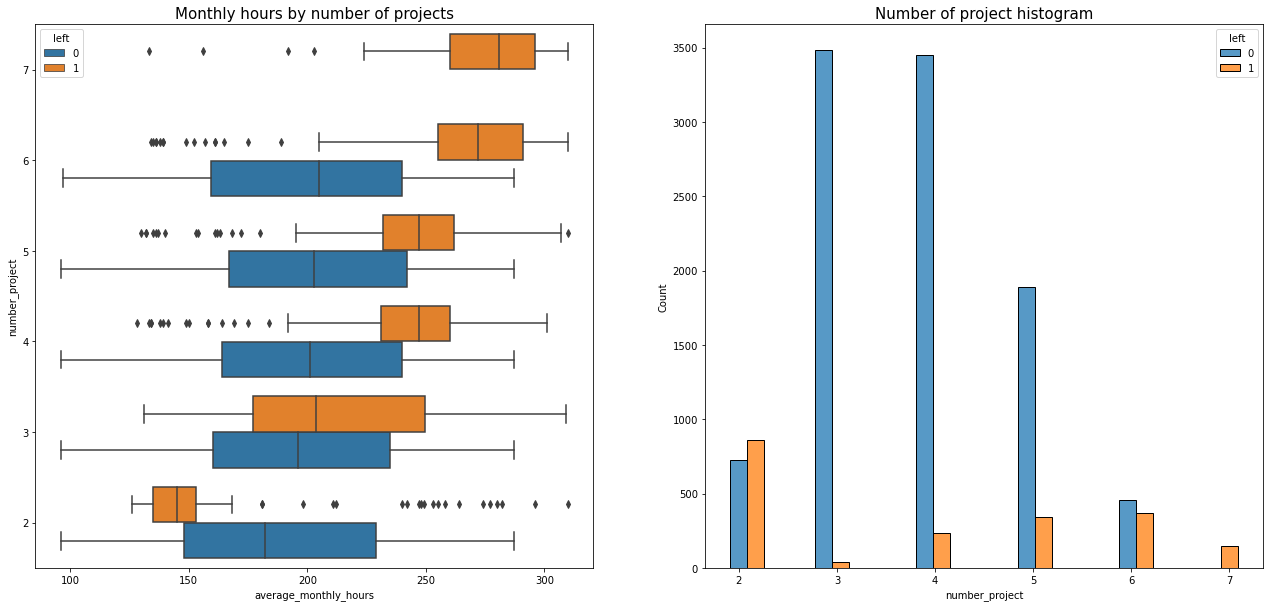

In [14]:
# Plot for average monthly hours vs no of projects 
fig,axes = plt.subplots(1,2,figsize = (22,10))

#(1,1)
sns.boxplot(x = df1['average_monthly_hours'], y = df1['number_project'], ax = axes[0],hue = df1['left'],orient='h')
axes[0].invert_yaxis()
axes[0].set_title('Monthly hours by number of projects', fontsize = 15)


#(1,2)
sns.histplot(x = df1['number_project'], ax = axes[1],hue = df1['left'],multiple = 'dodge',shrink=2)
axes[1].set_title('Number of project histogram',fontsize = 15)


1)Overwork and Turnover: Employees with high project loads (6–7 projects) worked excessively long hours (255–295 hours/month), leading to higher turnover rates. Overworked employees in this group likely quit due to burnout.

2)Optimal Project Load: Employees working on 3–4 projects had the lowest turnover rates, suggesting this is the ideal balance for employee retention.

In [15]:
df1[df1['number_project'] == 7]['left'].value_counts()

1    145
Name: left, dtype: int64

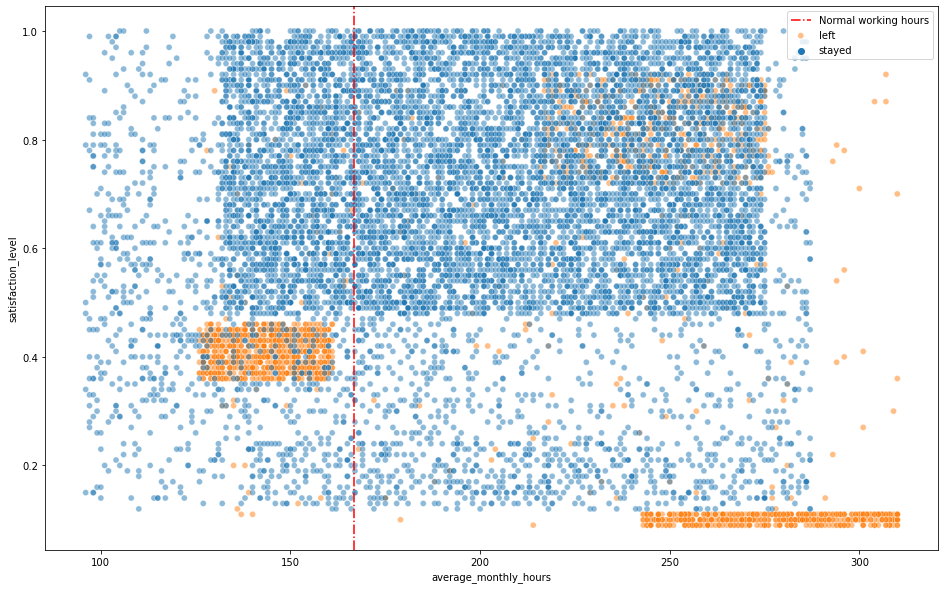

In [16]:
#Monday–Friday = 50 weeks * 40 hours per week / 12 months = 166.67 hours per month (2 weeks national holiday)
### scatter plot to check satisfaction  level by  ###
plt.figure(figsize = (16,10))
sns.scatterplot(y = df1['satisfaction_level'], x = df1['average_monthly_hours'],hue = df1['left'],alpha=0.5)
plt.axvline(166.67, ls = '-.', color = 'red', label = 'Normal working hours')
plt.legend(labels=['Normal working hours', 'left', 'stayed'])

1)A group of employees worked 240–315 hours per month (over 75 hours per week), likely contributing to their near-zero satisfaction levels. Another group with more typical hours still had low satisfaction (~0.4), possibly feeling pressured to work more due to their peers’ higher workloads.

2)Interestingly, employees working 210–280 hours per month had much higher satisfaction levels (~0.7–0.9). However, the unusual distribution shapes in the data may suggest manipulation or synthetic data.

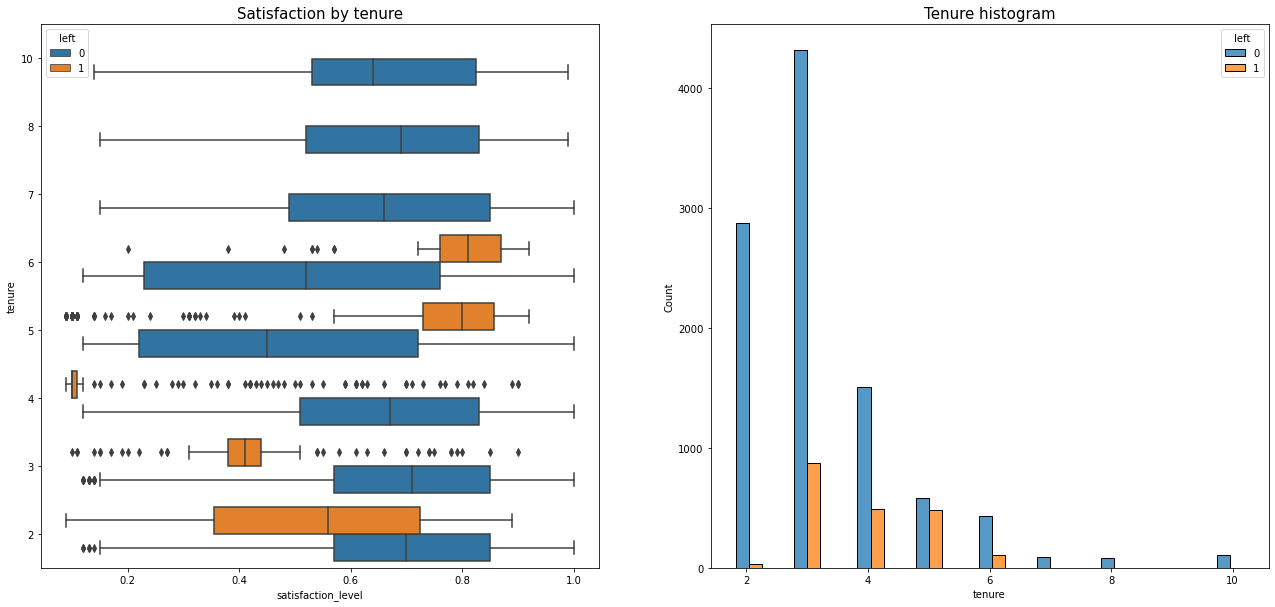

In [17]:
#satisfaction level vs tenure

fig,axes = plt.subplots(1,2,figsize = (22,10))

#(1,1)
sns.boxplot(x = df1['satisfaction_level'], y = df1['tenure'], ax = axes[0],hue = df1['left'],orient='h')
axes[0].invert_yaxis()
axes[0].set_title('Satisfaction by tenure', fontsize = 15)


#(1,2)
sns.histplot(x = df1['tenure'], ax = axes[1],hue = df1['left'],multiple = 'dodge',shrink=5)
axes[1].set_title('Tenure histogram',fontsize = 15)
plt.show()


1. Employees who left generally fell into two groups: those with short tenures and low satisfaction, and those with medium-length tenures but high satisfaction. Notably, four-year employees who left had unusually low satisfaction, suggesting possible company policy changes at this tenure.

2. The longest-tenured employees remained with the company, showing satisfaction levels similar to newer employees. The histogram indicates fewer long-tenured employees, potentially higher-ranking or better-paid individuals. A next step could be calculating the mean and median satisfaction scores for those who left versus those who stayed.

In [18]:

### YOUR CODE HERE ###
df1.groupby(by='left')['satisfaction_level'].agg(['mean','median'])

,mean,median
left,,
0,0.667365,0.69
1,0.440271,0.41


Text(0.5, 1.0, 'Salary vs tenure')

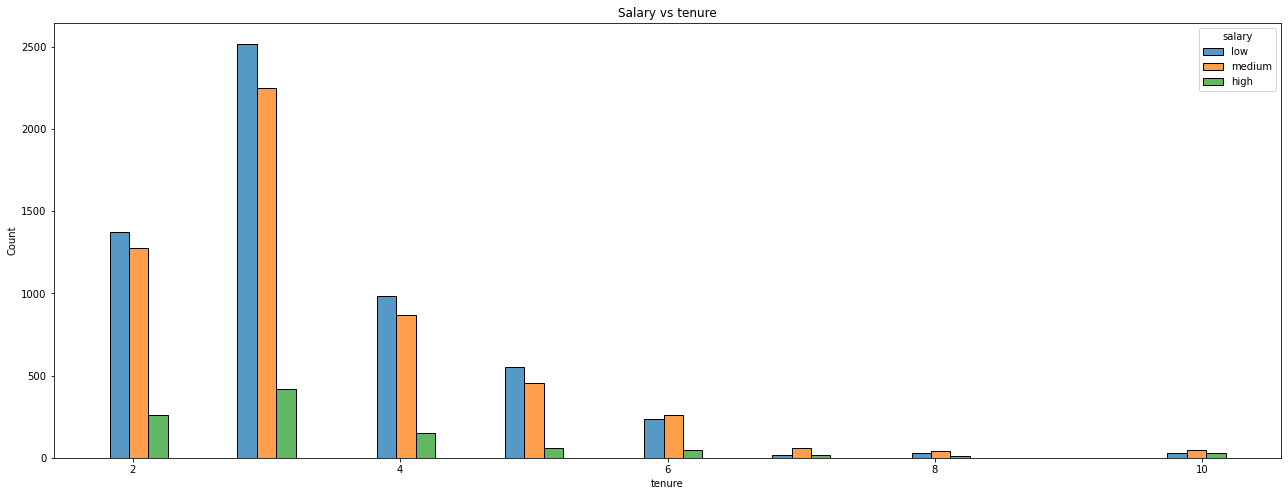

In [19]:
### Salary by tenure ###
plt.figure(figsize=(22,8))
sns.histplot(x = df1['tenure'], hue = df1['salary'], multiple='dodge', shrink=5)
plt.title('Salary vs tenure')

Text(0.5, 1.0, 'Salary vs tenure')

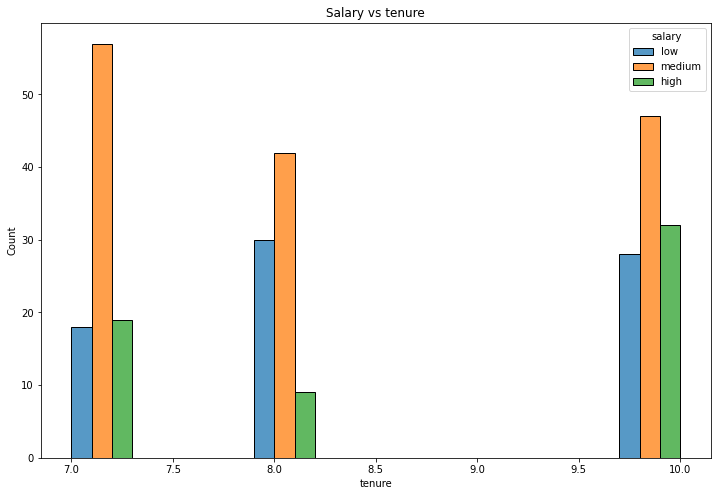

In [20]:
# Create a plot as needed
### Zooming in for long tenured ###
long_tenured  = df1[df1['tenure'] > 6]
plt.figure(figsize=(12,8))
sns.histplot(x =long_tenured['tenure'], hue = df1['salary'], multiple='dodge', shrink=1)
plt.title('Salary vs tenure')


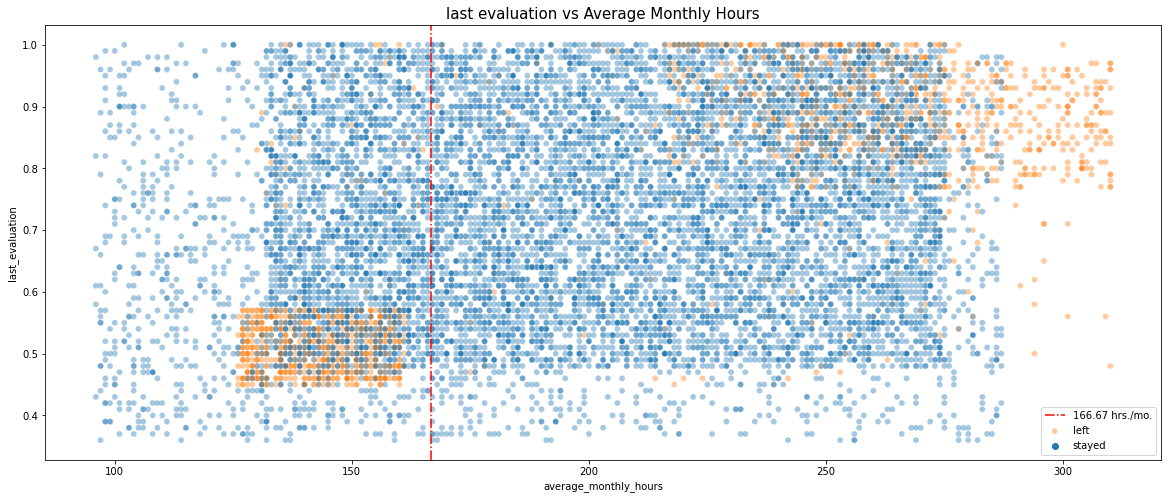

In [21]:
### YOUR CODE HERE ###
#last evaluation vs monthly_hours
plt.figure(figsize = (20,8))
sns.scatterplot(x=df1['average_monthly_hours'], y = df1['last_evaluation'], hue= df1['left'], alpha = 0.4)
plt.title('last evaluation vs Average Monthly Hours', fontsize = 15)
plt.axvline(166.67, ls = '-.', color = 'red')
plt.legend(labels=['166.67 hrs./mo.', 'left', 'stayed'])


1. The scatterplot shows two groups of employees who left: overworked, high-performing employees and those working slightly below the average 166.67 hours with lower evaluation scores. While there's a correlation between hours worked and evaluation, long hours don't always result in high scores.

2. Most employees worked significantly more than 167 hours per month. A next step would be to explore if those who worked long hours were promoted in the last five years.

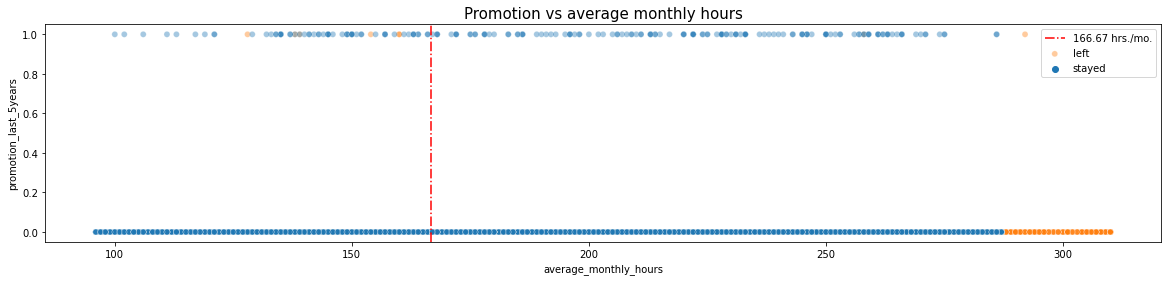

In [22]:
### quick check for promotion and working hours ###
plt.figure(figsize = (20,4))
sns.scatterplot(x=df1['average_monthly_hours'], y = df1['promotion_last_5years'], hue= df1['left'], alpha = 0.4)
plt.title('Promotion vs average monthly hours', fontsize = 15)
plt.axvline(166.67, ls = '-.', color = 'red')
plt.legend(labels=['166.67 hrs./mo.', 'left', 'stayed'])


1)The plot indicates that very few employees who were promoted in the last five years chose to leave the company.

2)Additionally, it shows that those who left were primarily working the longest hours, while only a small number of employees who worked the most hours received promotions.

In [23]:
df1[df1['left'] ==1]['department'].value_counts()

sales          550
technical      390
support        312
IT             158
hr             113
marketing      112
product_mng    110
accounting     109
RandD           85
management      52
Name: department, dtype: int64

Text(0.5, 1.0, 'Department wise employee status')

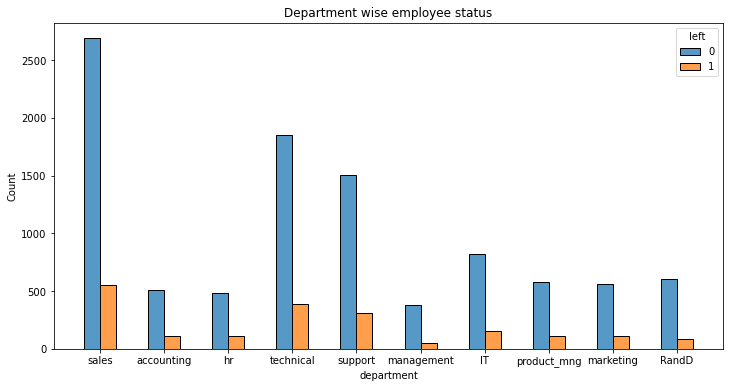

In [24]:
#histogram to check left vs stayed by department
plt.figure(figsize = (12,6))
sns.histplot(x = df1['department'], hue = df1['left'], discrete =1 , multiple= 'dodge', shrink=.5)
plt.title('Department wise employee status')


Text(0.5, 1.0, 'Corrlation heatmap')

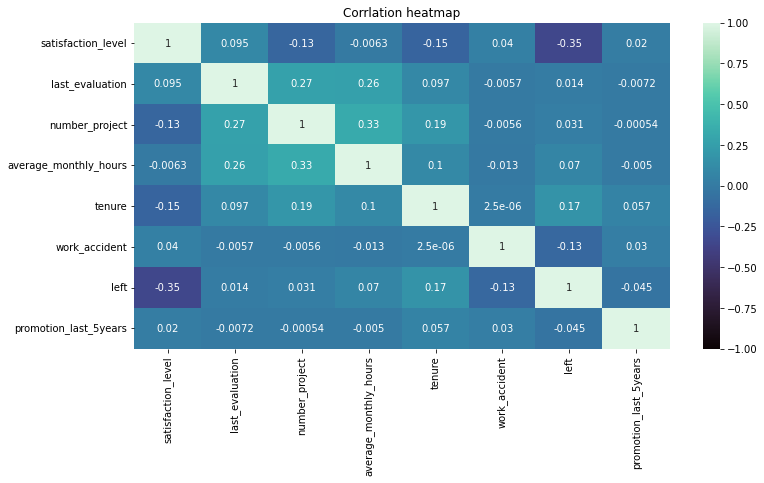

In [25]:
#Correlation check
plt.figure(figsize = (12,6))
sns.heatmap(df1.corr(), vmin=-1, vmax = 1, annot=True, cmap = sns.color_palette("mako", as_cmap=True))
plt.title('Corrlation heatmap')

### Insights

Employees are leaving the company due to management issues. Many are working long hours and handling too many projects while feeling unsatisfied. This can be frustrating, especially when they don’t get promotions or positive reviews. A lot of workers might be experiencing burnout. Additionally, it seems that employees who have been at the company for more than six years tend to stay.`

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

[Double-click to enter your responses here.]

In [26]:
#Starting with logistic regression

#encoding non-numeric 
df_encoded = df1.copy()

df_encoded['salary'] = df_encoded['salary'].astype('category').cat.set_categories(['low', 'medium', 'high']).cat.codes

df_encoded_final = pd.get_dummies(df_encoded, drop_first=False)

df_encoded_final.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


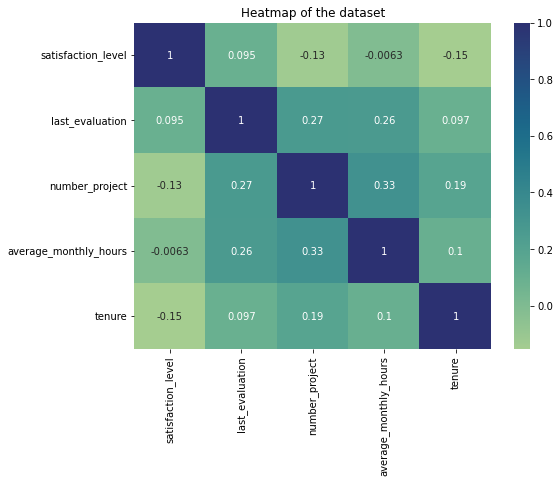

In [27]:
plt.figure(figsize=(8, 6))
sns.heatmap(df_encoded_final[['satisfaction_level', 'last_evaluation', 'number_project', 'average_monthly_hours', 'tenure']]
            .corr(), annot=True, cmap="crest")
plt.title('Heatmap of the dataset')
plt.show()

In [28]:
df_encoded_final1 = df_encoded_final[(df_encoded_final['tenure'] >= lower_range) & (df_encoded_final['tenure'] <= upper_range)]

# Display first few rows of new dataframe
df_encoded_final.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [29]:
y = df_encoded_final1['left']
y.head()

0    1
2    1
3    1
4    1
5    1
Name: left, dtype: int64

In [30]:
x = df_encoded_final1.drop(columns=['left'])

x.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,0,0,1,0,0
5,0.41,0.50,2,153,3,0,0,0,0,0,0,0,0,0,0,1,0,0


In [31]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, stratify=y, random_state=42)

In [32]:
logistic_regression = LogisticRegression(random_state=42, max_iter=500)

In [33]:
logistic_regression.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [34]:
y_pred = logistic_regression.predict(X_test)

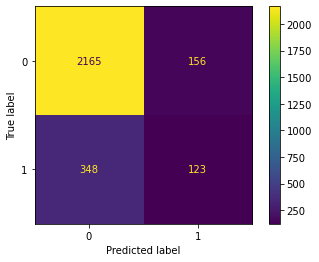

In [35]:
cm1 = confusion_matrix(y_test,y_pred, labels=logistic_regression.classes_)
disp1 = ConfusionMatrixDisplay(confusion_matrix= cm1, display_labels=logistic_regression.classes_)
disp1.plot(values_format='')


The upper-left quadrant represents the number of true negatives, while the upper-right quadrant shows the number of false positives. The bottom-left quadrant indicates the number of false negatives, and the bottom-right quadrant represents the number of true positives.

- **True Negatives**: This is the count of individuals who did not leave and were accurately predicted by the model as not leaving.
- **False Positives**: This represents the number of individuals who did not leave but were incorrectly predicted by the model as leaving.
- **False Negatives**: This is the count of individuals who left but were inaccurately predicted by the model as not leaving.
- **True Positives**: This represents the number of individuals who left and were accurately predicted by the model as leaving.

In an ideal model, all predictions would be true negatives and true positives, with no false negatives or false positives.

In [36]:
df_encoded_final['left'].value_counts(normalize = True)

0    0.833959
1    0.166041
Name: left, dtype: float64

In [37]:
#Class
target_names = ['Predicted would not leave', 'Predicted would leave']
print(classification_report(y_test, y_pred, target_names=target_names))

                           precision    recall  f1-score   support

Predicted would not leave       0.86      0.93      0.90      2321
    Predicted would leave       0.44      0.26      0.33       471

                 accuracy                           0.82      2792
                macro avg       0.65      0.60      0.61      2792
             weighted avg       0.79      0.82      0.80      2792



The classification report above shows that the logistic regression model achieved a precision of 79%, recall of 82%, f1-score of 80% (all weighted averages), and accuracy of 82%. However, if it's most important to predict employees who leave, then the scores are significantly lower.

**Trying to improve accuracy by using a tree-based model**


In [39]:
y = df_encoded_final['left']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

In [40]:
x = df_encoded_final.drop('left', axis=1)

In [41]:
x.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,0,0,1,0,0


In [42]:
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25, stratify = y, random_state =0)

In [43]:
dt_clf = DecisionTreeClassifier(random_state=0)

In [44]:
cv_params = {'max_depth' : [4,6,8,None],
             'min_samples_leaf' : [2,5,1],
             'min_samples_split' : [2,4,6]
}
scoring = {'accuracy', 'precision', 'recall','f1','roc_auc'}

In [45]:
dt1_clf = GridSearchCV(dt_clf, cv_params,refit = 'roc_auc', scoring=scoring, cv=4)

In [46]:
%time
dt1_clf.fit(x_train,y_train)

CPU times: user 3 µs, sys: 3 µs, total: 6 µs
Wall time: 9.54 µs


GridSearchCV(cv=4, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                

In [47]:
dt1_clf.best_params_

{'max_depth': 4, 'min_samples_leaf': 5, 'min_samples_split': 2}

In [48]:
dt1_clf.best_score_

0.969819392792457

In [49]:
pd.DataFrame(dt1_clf.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_roc_auc,split1_test_roc_auc,split2_test_roc_auc,split3_test_roc_auc,mean_test_roc_auc,std_test_roc_auc,rank_test_roc_auc,split0_test_precision,split1_test_precision,split2_test_precision,split3_test_precision,mean_test_precision,std_test_precision,rank_test_precision,split0_test_accuracy,split1_test_accuracy,split2_test_accuracy,split3_test_accuracy,mean_test_accuracy,std_test_accuracy,rank_test_accuracy,split0_test_f1,split1_test_f1,split2_test_f1,split3_test_f1,mean_test_f1,std_test_f1,rank_test_f1,split0_test_recall,split1_test_recall,split2_test_recall,split3_test_recall,mean_test_recall,std_test_recall,rank_test_recall
0,0.008784,0.000933,0.006550,0.000274,4,2,2,"{'max_depth': 4, 'min_samples_leaf': 2, 'min_s...",0.966357,0.970757,0.966687,0.972766,0.969142,0.002717,4,0.921622,0.912698,0.920981,0.910290,0.916398,0.004982,26,0.972432,0.972865,0.971530,0.972420,0.972312,0.000485,25,0.916667,0.918775,0.913514,0.917553,0.916627,0.001947,25,0.911765,0.924933,0.906166,0.924933,0.916949,0.008225,1
1,0.008375,0.000022,0.006565,0.000205,4,2,4,"{'max_depth': 4, 'min_samples_leaf': 2, 'min_s...",0.966357,0.970757,0.966687,0.972766,0.969142,0.002717,4,0.921622,0.912698,0.920981,0.910290,0.916398,0.004982,26,0.972432,0.972865,0.971530,0.972420,0.972312,0.000485,25,0.916667,0.918775,0.913514,0.917553,0.916627,0.001947,25,0.911765,0.924933,0.906166,0.924933,0.916949,0.008225,1
2,0.008665,0.000229,0.006837,0.000265,4,2,6,"{'max_depth': 4, 'min_samples_leaf': 2, 'min_s...",0.966357,0.970757,0.966687,0.972766,0.969142,0.002717,4,0.921622,0.912698,0.920981,0.910290,0.916398,0.004982,26,0.972432,0.972865,0.971530,0.972420,0.972312,0.000485,25,0.916667,0.918775,0.913514,0.917553,0.916627,0.001947,25,0.911765,0.924933,0.906166,0.924933,0.916949,0.008225,1
3,0.008714,0.000443,0.006759,0.000628,4,5,2,"{'max_depth': 4, 'min_samples_leaf': 5, 'min_s...",0.966266,0.970757,0.965456,0.976799,0.969819,0.004507,1,0.919137,0.912698,0.918478,0.907895,0.914552,0.004588,32,0.971988,0.972865,0.971085,0.971975,0.971978,0.000629,31,0.915436,0.918775,0.912281,0.916335,0.915707,0.002325,31,0.911765,0.924933,0.906166,0.924933,0.916949,0.008225,1
4,0.008515,0.000172,0.006679,0.000174,4,5,4,"{'max_depth': 4, 'min_samples_leaf': 5, 'min_s...",0.966266,0.970757,0.965456,0.976799,0.969819,0.004507,1,0.919137,0.912698,0.918478,0.907895,0.914552,0.004588,32,0.971988,0.972865,0.971085,0.971975,0.971978,0.000629,31,0.915436,0.918775,0.912281,0.916335,0.915707,0.002325,31,0.911765,0.924933,0.906166,0.924933,0.916949,0.008225,1
5,0.008189,0.000096,0.006254,0.000141,4,5,6,"{'max_depth': 4, 'min_samples_leaf': 5, 'min_s...",0.966266,0.970757,0.965456,0.976799,0.969819,0.004507,1,0.919137,0.912698,0.918478,0.907895,0.914552,0.004588,32,0.971988,0.972865,0.971085,0.971975,0.971978,0.000629,31,0.915436,0.918775,0.912281,0.916335,0.915707,0.002325,31,0.911765,0.924933,0.906166,0.924933,0.916949,0.008225,1
6,0.008083,0.000062,0.006199,0.000123,4,1,2,"{'max_depth': 4, 'min_samples_leaf': 1, 'min_s...",0.966357,0.969851,0.959367,0.972894,0.967117,0.005037,10,0.921622,0.912698,0.918478,0.910290,0.915772,0.004501,29,0.972432,0.972865,0.971085,0.972420,0.972201,0.000668,28,0.916667,0.918775,0.912281,0.917553,0.916319,0.002449,28,0.911765,0.924933,0.906166,0.924933,0.916949,0.008225,1
7,0.008843,0.000501,0.006646,0.000319,4,1,4,"{'max_depth': 4, 'min_samples_leaf': 1, 'min_s...",0.966357,0.969851,0.959367,0.972894,0.967117,0.005037,10,0.921622,0.912698,0.918478,0.910290,0.915772,0.004501,29,0.972432,0.972865,0.971085,0.972420,0.972201,0.000668,28,0.916667,0.918775,0.912281,0.917553,0.916319,0.002449,28,0.911765,0.924933,0.906166,0.924933,0.916949,0.008225,1
8,0.008358,0.000049,0.006528,0.000118,4,1,6,"{'max_depth': 4, 'min_samples_leaf': 1, 'min_s...",0.966357,0.969851,0.959367,0.972894,0.967117,0.005037,10,0.921622,0.912698,0.918478,0.910290,0.91

In [50]:
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
        model_name (string): what you want the model to be called in the output table
        model_object: a fit GridSearchCV object
        metric (string): precision, recall, f1, accuracy, or auc
  
    Returns a pandas df with the F1, recall, precision, accuracy, and auc scores
    for the model with the best mean 'metric' score across all validation folds.  
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'auc': 'mean_test_roc_auc',
                   'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy'
                  }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract Accuracy, precision, recall, and f1 score from that row
    auc = best_estimator_results.mean_test_roc_auc
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
  
    # Create table of results
    table = pd.DataFrame()
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy],
                          'auc': [auc]
                        })
  
    return table

In [51]:
tree1_cv_results = make_results('decision tree cv', dt1_clf, 'auc')
tree1_cv_results

,model,precision,recall,F1,accuracy,auc
0,decision tree cv,0.914552,0.916949,0.915707,0.971978,0.969819


In [52]:
rf = RandomForestClassifier(random_state=0)
cv_params = {'max_depth': [3,5, None], 
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500],
             }  

scoring = {'accuracy', 'precision', 'recall','f1','roc_auc'}

rf1 = GridSearchCV(rf, cv_params, cv=4, refit='roc_auc',scoring=scoring)

In [53]:
%time
#rf1.fit(x_train,y_train)

CPU times: user 6 µs, sys: 0 ns, total: 6 µs
Wall time: 10 µs


In [54]:
path = '/home/jovyan/work/'

In [55]:
def write_pickle(path, model, save_as):
    with open (path+save_as+'.pickle','wb') as to_write:
        pickle.dump(model,to_write)

In [56]:
def read_pickle(path, saved_name):
    with open (path+saved_name+'.pickle','rb') as to_read:
        model = pickle.load(to_read)
    return model

In [57]:
#write_pickle(path, rf1, 'hr_rf1')

In [58]:
rf1 = read_pickle(path, 'hr_rf1')

In [59]:
rf1.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features=1.0,
                       max_leaf_nodes=None, max_samples=0.7,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [60]:
rf1.best_score_

0.9804250949807172

In [61]:
rf1.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 500}

In [62]:
rf1_cv_results = make_results('random forest cv', rf1, 'auc')
print(tree1_cv_results)
print(rf1_cv_results)

              model  precision    recall        F1  accuracy       auc
0  decision tree cv   0.914552  0.916949  0.915707  0.971978  0.969819
              model  precision    recall        F1  accuracy       auc
0  random forest cv   0.950023  0.915614  0.932467  0.977983  0.980425


In [63]:
def get_scores(model_name, model, x_test, y_test):
    predictions = model.best_estimator_.predict(x_test)
    auc = roc_auc_score(y_test,predictions)
    accuracy = accuracy_score(y_test,predictions)
    precision = precision_score(y_test,predictions)
    recall = recall_score(y_test,predictions)
    f1 = f1_score(y_test,predictions)
    
    table = pd.DataFrame({
        'model' : [model_name],
        'precision' : [precision],
        'recall' : [recall],
        'accuracy':[accuracy],
        'f1' : [f1],
        'Auc' : [auc]
    })
    return table

In [64]:
rf1_test_scores = get_scores('Random forest', rf1, x_test,y_test)

In [66]:
rf1_test_scores

,model,precision,recall,accuracy,f1,Auc
0,Random forest,0.964211,0.919679,0.980987,0.941418,0.956439


- One might question the high evaluation scores because there could be data leakage happening. Data leakage is when information used to train the model should not be included because it also appears in the test data or isn’t available when the model is actually used.

- Using leaked data can result in scores that look good but won’t perform well in real life.

- In this case, the company may not have satisfaction levels for all employees. The `average_monthly_hours` column might also be leaking data. Employees who are planning to quit or are marked for firing might be working fewer hours.

- The first round of decision tree and random forest models used all variables as features. The next round will include feature engineering to improve the models.

- I could drop the `satisfaction_level` variable and create a new feature to indicate whether an employee is overworked. This new feature could be called `overworked` and will be a binary variable (yes or no).

In [68]:
#Feature engineering

df2 = df_encoded_final.drop('satisfaction_level', axis = True)
df2.head()

,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [70]:
df2['overworked'] = df2['average_monthly_hours']

In [71]:
df2['overworked'].mean()

200.4735218080227

In [72]:
df2['overworked'].max()

310

In [73]:
df2['overworked'].min()

96

In [74]:
df2['overworked'] = (df2['overworked'] > 175 ).astype('int')

In [75]:
df2['overworked']

0        0
1        1
2        1
3        1
4        0
        ..
11995    1
11996    1
11997    1
11998    0
11999    1
Name: overworked, Length: 11991, dtype: int64

In [76]:
df2 = df2.drop('average_monthly_hours', axis = True)
df2.head()

,last_evaluation,number_project,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,overworked
0,0.53,2,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0.86,5,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1
2,0.88,7,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1
3,0.87,5,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1
4,0.52,2,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0


In [77]:
#decision tree approach after feature engineering

y = df2['left']

x = df2.drop('left', axis = True)

In [78]:
x_train, x_test, y_train, y_test  = train_test_split(x,y, test_size = 0.25, stratify= y, random_state = 0)

In [79]:
dt2 = DecisionTreeClassifier(random_state=0)

cv_params = {'max_depth' : [4,6,8,None],
             'min_samples_leaf' : [2,5,1],
             'min_samples_split' : [2,4,6]
}
scoring = {'accuracy', 'precision', 'recall','f1','roc_auc'}

dt2_cv = GridSearchCV(dt2,cv_params, scoring=scoring, refit='roc_auc', cv = 4 )

In [80]:
dt2_cv.fit(x_train,y_train)

GridSearchCV(cv=4, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                

In [81]:
dt2_cv.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [83]:
dt2_cv.best_params_

{'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 6}

In [84]:
dt2_cv.best_score_

0.9586752505340426

In [87]:
tree2_cv_results = make_results('Decision Tree 2', dt2_cv, 'auc')
print(tree1_cv_results)
print(tree2_cv_results)

              model  precision    recall        F1  accuracy       auc
0  decision tree cv   0.914552  0.916949  0.915707  0.971978  0.969819
             model  precision    recall        F1  accuracy       auc
0  Decision Tree 2   0.856693  0.903553  0.878882  0.958523  0.958675


In [89]:
#Random forest after feature engineering

rf2 = RandomForestClassifier(random_state=0)

cv_params = {'max_depth': [3,5, None], 
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500],
             }  

scoring = {'accuracy', 'precision', 'recall','f1','roc_auc'}

rf2_cv = GridSearchCV(rf, cv_params, cv=4, refit='roc_auc',scoring=scoring)

In [90]:
#rf2_cv.fit(x_train,y_train)

GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,...
                                              verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [91]:
#write_pickle(path,rf2_cv,'RF2')

In [92]:
rf2 = read_pickle(path,'RF2' )

In [93]:
rf2.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features=1.0,
                       max_leaf_nodes=None, max_samples=0.7,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [94]:
rf2.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 300}

In [95]:
rf2.best_score_

0.9648100662833985

In [96]:
rf2_cv_results = make_results('random forest2 cv', rf2, 'auc')
print(tree2_cv_results)
print(rf2_cv_results)

             model  precision    recall        F1  accuracy       auc
0  Decision Tree 2   0.856693  0.903553  0.878882  0.958523  0.958675
               model  precision    recall        F1  accuracy      auc
0  random forest2 cv   0.866758  0.878754  0.872407  0.957411  0.96481


In [97]:
get_scores("random forest 2", rf2, x_test, y_test)

,model,precision,recall,accuracy,f1,Auc
0,random forest 2,0.870406,0.903614,0.961641,0.8867,0.938407


In [99]:
predictions = rf2.best_estimator_.predict(x_test)

In [100]:
cm  = confusion_matrix(y_test,predictions,labels=rf2.classes_)

disp2 = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=rf2.classes_ )

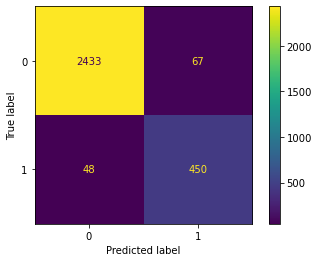

In [102]:
disp2.plot(values_format='')

[]

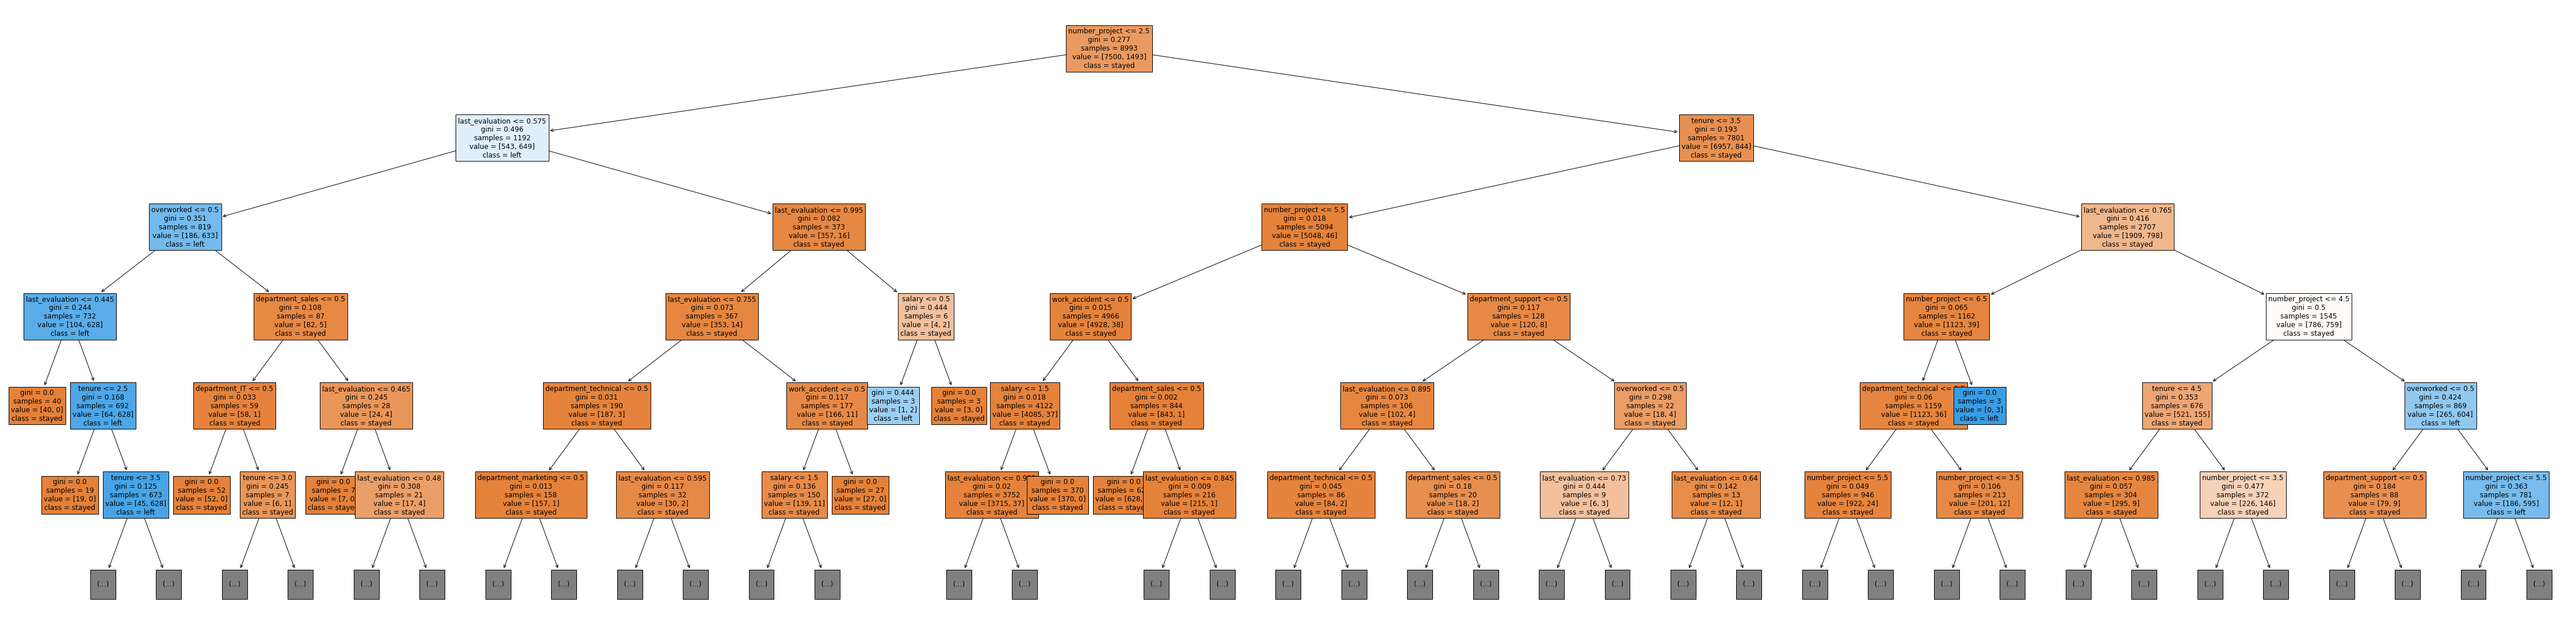

In [111]:
#checking DT split
plt.figure(figsize=(80,20))
plot_tree(dt2_cv.best_estimator_,max_depth=5, fontsize=12, feature_names=x.columns, filled=True,class_names={0:'stayed', 1:'left'})
plt.plot()

In [119]:
# checking DT feature importance

Dt2_importance = pd.DataFrame(dt2_cv.best_estimator_.feature_importances_, columns = ['Gini impurity'], index=x.columns)
Dt2_importance = Dt2_importance[Dt2_importance['Gini impurity'] > 0]
Dt2_importance = Dt2_importance.sort_values(by ='Gini impurity', ascending =False)


Dt2_importance

,Gini impurity
last_evaluation,0.343958
number_project,0.343385
tenure,0.215681
overworked,0.093498
department_support,0.001142
salary,0.000910
department_sales,0.000607
department_technical,0.000418
work_accident,0.000183
department_IT,0.000139


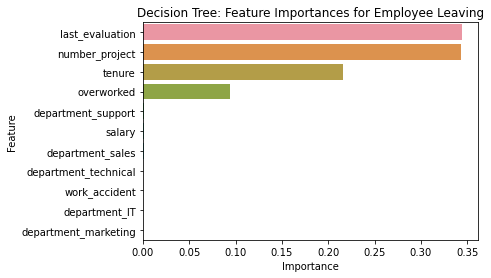

In [123]:
sns.barplot(data=Dt2_importance, x = 'Gini impurity', y =Dt2_importance.index )
plt.title("Decision Tree: Feature Importances for Employee Leaving", fontsize=12)
plt.ylabel("Feature")
plt.xlabel("Importance")
plt.show()

The bar plot above indicates that in this decision tree model, the variables `last_evaluation`, `number_project`, `tenure`, and `overworked` have the highest importance, ranked in that order. These variables are the most effective in predicting the outcome variable, `left`.

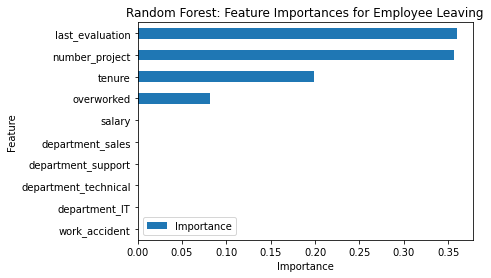

In [125]:
# Get feature importances
feat_impt = rf2.best_estimator_.feature_importances_

# Get indices of top 10 features
ind = np.argpartition(rf2.best_estimator_.feature_importances_, -10)[-10:]

# Get column labels of top 10 features 
feat = x.columns[ind]

# Filter `feat_impt` to consist of top 10 feature importances
feat_impt = feat_impt[ind]

y_df = pd.DataFrame({"Feature":feat,"Importance":feat_impt})
y_sort_df = y_df.sort_values("Importance")
fig = plt.figure()
ax1 = fig.add_subplot(111)

y_sort_df.plot(kind='barh',ax=ax1,x="Feature",y="Importance")

ax1.set_title("Random Forest: Feature Importances for Employee Leaving", fontsize=12)
ax1.set_ylabel("Feature")
ax1.set_xlabel("Importance")

plt.show()

The plot above shows that in this random forest model, `last_evaluation`, `number_project`, `tenure`, and `overworked` have the highest importance, in that order. These variables are most helpful in predicting the outcome variable, `left`, and they are the same as the ones used by the decision tree model.

### Summary of model results

**Logistic Regression**

The logistic regression model achieved precision of 80%, recall of 83%, f1-score of 80% (all weighted averages), and accuracy of 83%, on the test set.

**Tree-based Machine Learning**

After conducting feature engineering, the decision tree model achieved AUC of 93.8%, precision of 87.0%, recall of 90.4%, f1-score of 88.7%, and accuracy of 96.2%, on the test set. The random forest modestly outperformed the decision tree model. 

### **Conclusion and Recommendations**

The models and feature importances confirm that employees at the company are overworked. To help retain employees, the following recommendations could be made to the stakeholders:

- Limit the number of projects each employee can take on.
- Consider promoting employees who have been with the company for at least four years, or further investigate why four-year tenured employees are dissatisfied.
- Either reward employees for working longer hours or avoid requiring them to do so.
- Ensure employees are aware of the company’s overtime pay policies. Clarify expectations regarding workload and time off if they are not already explicit.
- Facilitate company-wide and team discussions to better understand and address the work culture, both generally and in specific situations.
- Avoid reserving high evaluation scores for employees who work over 200 hours per month. Implement a proportionate scale for recognizing employees who contribute more or put in additional effort.